In [2]:
!pip install pandas numpy tweepy nltk matplotlib seaborn

In [4]:
!pip install tweepy[async]

In [6]:
!pip install python-dotenv

In [22]:
!pip install --upgrade tweepy

In [3]:
import pandas as pd
import numpy as np
import tweepy
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER Lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [10]:
from google.colab import drive
import os
from dotenv import load_dotenv

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
dotenv_path = "/content/drive/MyDrive/Twitter API/API.env"
load_dotenv(dotenv_path=dotenv_path)


API_KEY = os.getenv("API_KEY")
API_SECRET = os.getenv("API_SECRET")
ACCESS_TOKEN = os.getenv("ACCESS_TOKEN")
ACCESS_SECRET = os.getenv("ACCESS_SECRET")
BEARER_TOKEN = os.getenv("BEARER_TOKEN")

# Verification
if API_KEY and API_SECRET:
    print("API Keys Loaded Successfully")
else:
    print("Failed to load API keys")

API Keys Loaded Successfully


In [25]:
client = tweepy.Client(bearer_token=BEARER_TOKEN)

In [36]:
import tweepy

# Authenticate
auth = tweepy.OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

# Create API object
api = tweepy.API(auth, wait_on_rate_limit=True)

In [37]:
import pandas as pd

def fetch_media_tweets_v2(query, max_results=50):
    tweets = []

    try:
        response = client.search_recent_tweets(
            query=query + " has:media",  # Filter only media tweets
            tweet_fields=["created_at", "text", "attachments"],
            expansions=["attachments.media_keys"],
            media_fields=["media_key", "url"],
            max_results=max_results
        )

        if response.data:
            for tweet in response.data:
                if tweet.attachments:
                    media_keys = tweet.attachments.get("media_keys", [])
                    for media in response.includes.get("media", []):
                        if media.media_key in media_keys:
                            tweets.append([tweet.created_at, tweet.text, media.url])

        df = pd.DataFrame(tweets, columns=["Date", "Tweet", "Media_URL"])
        return df

    except Exception as e:
        print("Error:", e)
        return None

In [40]:
query = "Technology"
df = fetch_media_tweets_v2(query, 15)

if df is not None:
    print(df.head())


                       Date  \
0 2025-03-09 11:46:39+00:00   
1 2025-03-09 11:46:28+00:00   
2 2025-03-09 11:46:28+00:00   
3 2025-03-09 11:46:28+00:00   
4 2025-03-09 11:46:17+00:00   

                                               Tweet  \
0  🚀 Experience the Future with SPAACE_IO! 🌌\n\nJ...   
1  RT @designboom: easco modernizes flip phones w...   
2  RT @designboom: easco modernizes flip phones w...   
3  RT @designboom: easco modernizes flip phones w...   
4  Robotic orthopedic surgery is a state-of-the-a...   

                                         Media_URL  
0  https://pbs.twimg.com/media/GlmLXIMXAAA27hV.jpg  
1  https://pbs.twimg.com/media/GlkWRVFWQAARkBH.jpg  
2  https://pbs.twimg.com/media/GlkWRhsW4AAYMsB.jpg  
3  https://pbs.twimg.com/media/GlkWRuxXMAApFBn.jpg  
4  https://pbs.twimg.com/media/GlmLSACXgAAxns8.jpg  


In [41]:
from textblob import TextBlob

def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    return "Positive" if analysis.sentiment.polarity > 0 else ("Negative" if analysis.sentiment.polarity < 0 else "Neutral")

df["Sentiment"] = df["Tweet"].apply(analyze_sentiment)

# Show sample results
df.head()

,Date,Tweet,Media_URL,Sentiment
0,2025-03-09 11:46:39+00:00,🚀 Experience the Future with SPAACE_IO! 🌌\n\nJ...,https://pbs.twimg.com/media/GlmLXIMXAAA27hV.jpg,Neutral
1,2025-03-09 11:46:28+00:00,RT @designboom: easco modernizes flip phones w...,https://pbs.twimg.com/media/GlkWRVFWQAARkBH.jpg,Neutral
2,2025-03-09 11:46:28+00:00,RT @designboom: easco modernizes flip phones w...,https://pbs.twimg.com/media/GlkWRhsW4AAYMsB.jpg,Neutral
3,2025-03-09 11:46:28+00:00,RT @designboom: easco modernizes flip phones w...,https://pbs.twimg.com/media/GlkWRuxXMAApFBn.jpg,Neutral
4,2025-03-09 11:46:17+00:00,Robotic orthopedic surgery is a state-of-the-a...,https://pbs.twimg.com/media/GlmLSACXgAAxns8.jpg,Positive


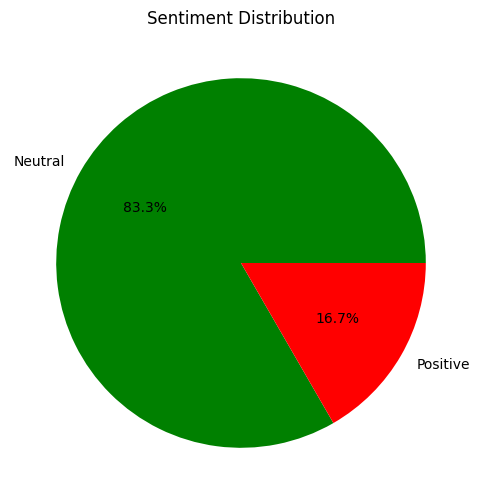

<ipython-input-42-592220c53679>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['green', 'red', 'gray'])
<ipython-input-42-592220c53679>:16: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['green', 'red', 'gray'])


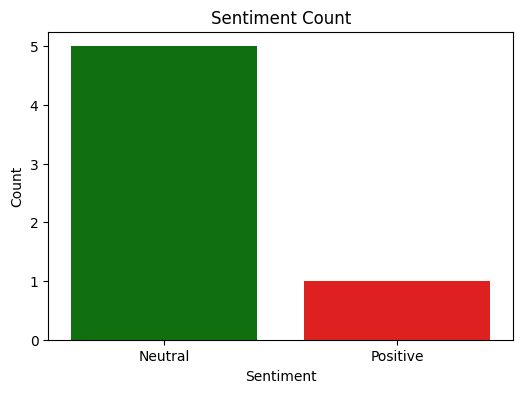

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count each sentiment category
sentiment_counts = df["Sentiment"].value_counts()

# 📊 Pie Chart
plt.figure(figsize=(6,6))
sentiment_counts.plot.pie(autopct='%1.1f%%', colors=['green', 'red', 'gray'])
plt.title("Sentiment Distribution")
plt.ylabel("")
plt.show()

# 📊 Bar Plot
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['green', 'red', 'gray'])
plt.title("Sentiment Count")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

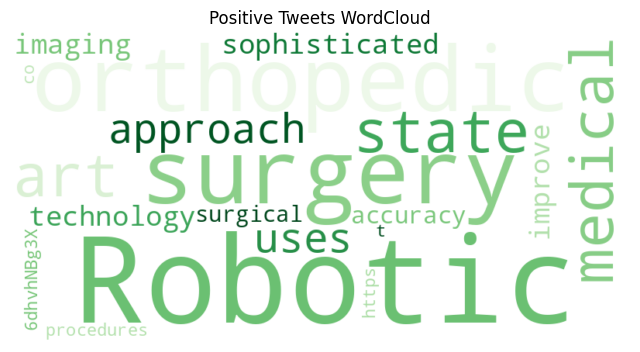

⚠️ No Negative Tweets Found - Skipping WordCloud.


In [44]:
from wordcloud import WordCloud

# Separate positive & negative tweets
positive_text = " ".join(df[df["Sentiment"] == "Positive"]["Tweet"])
negative_text = " ".join(df[df["Sentiment"] == "Negative"]["Tweet"])

# Generate WordClouds only if there is text available
if positive_text.strip():
    plt.figure(figsize=(8,5))
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Positive Tweets WordCloud")
    plt.show()
else:
    print("⚠️ No Positive Tweets Found - Skipping WordCloud.")

if negative_text.strip():
    plt.figure(figsize=(8,5))
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Negative Tweets WordCloud")
    plt.show()
else:
    print("⚠️ No Negative Tweets Found - Skipping WordCloud.")